In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib as matplot

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff # create_table for categorical variables
import cufflinks
cufflinks.go_offline()  
cufflinks.set_config_file(world_readable=True, theme='pearl')

import plotly.graph_objs as go # graphs on objects
import chart_studio.plotly as py # plotly library

import datetime
import plotly.graph_objects as go

## Data Exploratory and Understanding

### Import the original data

In [2]:
df = pd.read_csv('flat_sb_2020.csv',lineterminator='\n',low_memory=False)

In [3]:
ads_df = pd.read_excel('ads_info.xlsx')

In [4]:
df.describe()

,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,place,...,retweeted_status.quoted_status.place,retweeted_status.quoted_status.contributors,retweeted_status.quoted_status.quote_count,retweeted_status.quoted_status.reply_count,retweeted_status.quoted_status.retweet_count,retweeted_status.quoted_status.favorite_count,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
count,494079.000000,4.940790e+05,4.940790e+05,5.818000e+04,5.818000e+04,8.136000e+04,8.136000e+04,0.0,0.0,0.0,...,0.0,0.0,23715.000000,23715.000000,23715.000000,23715.000000,7.670000e+02,7.670000e+02,1.863000e+03,1.863000e+03
mean,281522.611263,1.224143e+18,1.224143e+18,1.223834e+18,1.223834e+18,2.181581e+17,2.181581e+17,NaN,NaN,NaN,...,NaN,NaN,1010.453637,498.526544,3493.584651,16623.151001,1.211414e+18,1.211414e+18,1.215874e+18,1.215874e+18
std,163585.252349,1.602256e+13,1.602256e+13,7.242075e+15,7.242075e+15,4.124439e+17,4.124439e+17,NaN,NaN,NaN,...,NaN,NaN,2390.237861,1983.446716,5839.301197,25671.982581,9.586781e+16,9.586781e+16,7.856791e+16,7.856791e+16
min,2.000000,1.224113e+18,1.224113e+18,2.627492e+17,2.627492e+17,1.200000e+01,1.200000e+01,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.409060e+17,2.409060e+17,8.783073e+09,8.783073e+09
25%,140303.500000,1.224130e+18,1.224130e+18,1.224123e+18,1.224123e+18,5.689803e+07,5.689803e+07,NaN,NaN,NaN,...,NaN,NaN,37.000000,30.000000,164.000000,509.000000,1.223816e+18,1.223816e+18,1.223962e+18,1.223962e+18
50%,275841.000000,1.224142e+18,1.224142e+18,1.224134e+18,1.224134e+18,4.744472e+08,4.744472e+08,NaN,NaN,NaN,...,NaN,NaN,620.000000,188.000000,2199.000000,9539.000000,1.224046e+18,1.224046e+18,1.224115e+18,1.224115e+18
75%,423165.500000,1.224156e+18,1.224156e+18,1.224149e+18,1.224149e+18,3.901788e+09,3.901788e+09,NaN,NaN,NaN,...,NaN,NaN,620.000000,188.000000,4077.000000,22234.000000,1.224115e+18,1.224115e+18,1.224146e+18,1.224146e+18
max,563274.000000,1.224173e+18,1.224173e+18,1.224173e+18,1.224173e+18,1.224170e+18,1.224170e+18,NaN,NaN,NaN,...,NaN,NaN,109403.000000,36402.000000,139513.000000,547929.000000,1.224168e+18,1.224168e+18,1.224171e+18,1.224171e+18


In [5]:
df.head()

,Unnamed: 0,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted_status.extended_tweet.entities.polls,retweeted_status.scopes.followers,quoted_status.entities.polls,retweeted_status.quoted_status.extended_tweet.entities.polls,retweeted_status.quoted_status.entities.polls,quoted_status.extended_tweet.entities.polls,retweeted_status.quoted_status.user.withheld_in_countries,retweeted_status.quoted_status.withheld_in_countries,quoted_status.user.withheld_in_countries,quoted_status.withheld_in_countries
0,2,5e37c79ad45e79dd671e47ed,Mon Feb 03 03:28:35 +0000 2020,1224172804100194304,1224172804100194304,RT @theBaeSensei: I’ll drink bleach before i p...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,5e37c79ad45e79dd671e47ec,Mon Feb 03 03:28:44 +0000 2020,1224172844097179654,1224172844097179654,RT @theBaeSensei: I’ll drink bleach before i p...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,5e37c79ad45e79dd671e47e8,Mon Feb 03 03:29:44 +0000 2020,1224173095369486338,1224173095369486338,"RT @BleachImmortal: ""My name is Ichigo Kurosak...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5e37c79ad45e79dd671e47e6,Mon Feb 03 03:29:54 +0000 2020,1224173137698467842,1224173137698467842,"RT @ZBrag101: My Next Video, hav't started yet...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,5e37c79ad45e79dd671e47f0,Mon Feb 03 03:28:29 +0000 2020,1224172779559321600,1224172779559321600,@AubreyNexus @LaudenRolly When I bleach my hai...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# All features
print(df.columns.values)

['Unnamed: 0' '_id' 'created_at' 'id' 'id_str' 'text' 'source' 'truncated'
 'in_reply_to_status_id' 'in_reply_to_status_id_str' 'in_reply_to_user_id'
 'in_reply_to_user_id_str' 'in_reply_to_screen_name' 'geo' 'coordinates'
 'place' 'contributors' 'is_quote_status' 'quote_count' 'reply_count'
 'retweet_count' 'favorite_count' 'favorited' 'retweeted' 'filter_level'
 'lang' 'matching_rules' 'timestamp' 'valid_time' 'period' 'AdTitle'
 'Brand' 'sentiment' 'user.id' 'user.id_str' 'user.name'
 'user.screen_name' 'user.location' 'user.url' 'user.description'
 'user.translator_type' 'user.protected' 'user.verified'
 'user.followers_count' 'user.friends_count' 'user.listed_count'
 'user.favourites_count' 'user.statuses_count' 'user.created_at'
 'user.utc_offset' 'user.time_zone' 'user.geo_enabled' 'user.lang'
 'user.contributors_enabled' 'user.is_translator'
 'user.profile_background_color' 'user.profile_background_image_url'
 'user.profile_background_image_url_https' 'user.profile_background_t

### New dataframe

In [7]:
# Select useful features ( initiation )
Tweet = df[['timestamp','text','Brand','favorite_count','reply_count','sentiment','period','AdTitle','user.description','user.followers_count','user.location','retweet_count']]

In [8]:
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494079 entries, 0 to 494078
Data columns (total 12 columns):
timestamp               494079 non-null float64
text                    494079 non-null object
Brand                   494079 non-null object
favorite_count          494079 non-null int64
reply_count             494079 non-null int64
sentiment               494079 non-null object
period                  494079 non-null object
AdTitle                 494079 non-null object
user.description        413893 non-null object
user.followers_count    494079 non-null int64
user.location           350830 non-null object
retweet_count           494079 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 45.2+ MB


In [9]:
Tweet.head()

,timestamp,text,Brand,favorite_count,reply_count,sentiment,period,AdTitle,user.description,user.followers_count,user.location,retweet_count
0,1.580701e+09,RT @theBaeSensei: I’ll drink bleach before i p...,NFL,0,0,negative,4,Next 100,3 cans short of a 6 pack ... #TeamOnBullshit,244,NaN,0
1,1.580701e+09,RT @theBaeSensei: I’ll drink bleach before i p...,NFL,0,0,negative,4,Next 100,boy momma. 28. 🤞🏽🐻💙 insta @chanelisamazing,1236,NaN,0
2,1.580701e+09,"RT @BleachImmortal: ""My name is Ichigo Kurosak...",NFL,0,0,positive,4,Next 100,Hey everyone! I'm RallyHitzZ | 17 | #Anime | E...,159,Soul Society,0
3,1.580701e+09,"RT @ZBrag101: My Next Video, hav't started yet...",NFL,0,0,negative,4,Next 100,My advice to the world: Normalcy is overrated....,561,"Fort Wayne, IN",0
4,1.580701e+09,@AubreyNexus @LaudenRolly When I bleach my hai...,NFL,2,2,neutral,4,Next 100,20 | TN | Cosplayer | Hero Enthusiast\n\nNext ...,11,"Murfreesboro, TN",1


In [10]:
Tweet[Tweet['user.location']=='Brazil']

,timestamp,text,Brand,favorite_count,reply_count,sentiment,period,AdTitle,user.description,user.followers_count,user.location,retweet_count
5921,1.580686e+09,@backstreetboys @chancetherapper @Doritos Haha...,Doritos,0,0,positive,1,The Cool Ranch,"Artesã, designer de interiores, echelon e aman...",357,Brazil,0
5940,1.580686e+09,RT @backstreetboys: Throwback to last year’s #...,Doritos,0,0,positive,1,The Cool Ranch,"Artesã, designer de interiores, echelon e aman...",357,Brazil,0
6077,1.580700e+09,RT @tide: Saving the world (again) &gt; laundr...,Tide,0,0,neutral,4,Finally Later,I love meeting new worlds reading books and pl...,956,Brazil,0
6660,1.580696e+09,RT @tide: Saving the world (again) &gt; laundr...,Tide,0,0,neutral,3,Finally Later,NaN,483,Brazil,0
9096,1.580700e+09,RT @tide: Saving the world (again) &gt; laundr...,Tide,0,0,neutral,4,Finally Later,I love meeting new worlds reading books and pl...,956,Brazil,0
...,...,...,...,...,...,...,...,...,...,...,...,...
434458,1.580689e+09,RT @ComicBook: Chris Evans in this Hyundai Son...,Cheetos,0,0,positive,2,Can't Touch This,"🎶Been through some bad shit, I should be a sad...",153,Brazil,0
464434,1.580694e+09,RT @007: The 25th Bond film will change everyt...,Metro Goldwyn Mayer,0,0,neutral,half-time,Trailer: No Time To Die,"""My demons though quiet, are never quite silen...",629,Brazil,0
466117,1.580691e+09,RT @007: The 25th Bond film will change everyt...,Metro Goldwyn Mayer,0,0,neutral,2,Trailer: No Time To Die,"🎶Been through some bad shit, I should be a sad...",153,Brazil,0
487904,1.580694e+09,RT @007: The 25th Bond film will change everyt...,Metro Goldwyn Mayer,0,0,neutral,half-time,Trailer: No Time To Die,"""My demons though quiet, are never quite silen...",629,Brazil,0


## Data Preprocessing

In [15]:
Tweet.timestamp=pd.to_datetime(Tweet.timestamp,unit ='s')

In [22]:
Tweet['engage']=Tweet['retweet_count']+Tweet['reply_count']+Tweet['favorite_count']

In [23]:
Tw_cost = Tweet.groupby('Brand').sum()


In [24]:
Tw_cost.head()

,favorite_count,reply_count,user.followers_count,retweet_count,engage
Brand,,,,,
Amazon Prime,28631,2609,76433706,5832,37072
Audi,52060,4079,337185165,6682,62821
Avacados From Mexico,13903,1759,28593427,2587,18249
Bloomberg,7205,338,14795189,1398,8941
Bud Light X Tide,139194,2909,27737828,18480,160583


In [26]:
new_df = pd.merge(Tw_cost,ads_df,how='inner', on = 'Brand')
new_df['engage_per_second'] = new_df['engage']/new_df['time(seconds)']
new_df['Follower_per_second'] = new_df['user.followers_count']/new_df['time(seconds)']
new_df = new_df.sort_values('engage_per_second',ascending=False)
new_df.head()

,Brand,favorite_count,reply_count,user.followers_count,retweet_count,engage,User Count,time(seconds),rating,youtube views,Cost,engage_per_second,Follower_per_second
23,Metro Goldwyn Mayer,110923,3166,175960045,30005,144094,12786.0,30.0,4.98,2097814.0,560000.0,4803.133333,5.865335e+06
33,Pringles,112788,9553,118818328,16844,139185,29975.0,30.0,4.85,673842.0,560000.0,4639.500000,3.960611e+06
42,T-Mobile,63747,101965,2412803243,37684,203396,29633.0,60.0,5.64,16020333.0,1120000.0,3389.933333,4.021339e+07
4,Bud Light X Tide,139194,2909,27737828,18480,160583,378.0,60.0,5.28,591500.0,1120000.0,2676.383333,4.622971e+05
7,Cheetos,60295,4704,298310633,9033,74032,18786.0,30.0,6.07,12936279.0,560000.0,2467.733333,9.943688e+06


In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(x=new_df['Brand'].unique(), y=new_df['engage_per_second']))
fig.update_layout(
    title="<b>Top 5 Performers on engagement volume <b> ",
    yaxis_title="<b>Number of Engagement per second of ad<b>",plot_bgcolor='rgb(255,255,255)',
    font=dict(
        size=13,
        
))


In [28]:
sentiment_tweet_positive= Tweet[(Tweet['sentiment']=='positive')].groupby(['Brand']).count()['timestamp']
sentiment_tweet_total = Tweet.groupby(['Brand']).count()['timestamp']
positive_prop_sentiment = sentiment_tweet_positive/sentiment_tweet_total
positive_prop_sentiment
new_df_2 = pd.merge(positive_prop_sentiment,ads_df,how='inner', on = 'Brand')
new_df_2.rename(columns={'timestamp':'proportion_positive'},inplace=True)
new_df_2= new_df_2.sort_values('proportion_positive',ascending=False)

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(x=new_df_2['Brand'].unique(), y=new_df_2['proportion_positive']))
fig.update_layout(
    title="Top 10 Brands that generate largest proportion of positive tweets ",
    yaxis_title="# Proportion of positivity in tweets",
    font=dict(
        size=13
))


In [30]:
sentiment_tweet_negative= Tweet[(Tweet['sentiment']=='negative')].groupby(['Brand']).count()['timestamp']
sentiment_tweet_total = Tweet.groupby(['Brand']).count()['timestamp']
negative_prop_sentiment = sentiment_tweet_negative/sentiment_tweet_total



In [31]:
new_df_3 = pd.merge(negative_prop_sentiment,ads_df,how='inner', on = 'Brand')


In [32]:
new_df_3.rename(columns={'timestamp':'proportion_negative'},inplace=True)
new_df_3 =new_df_3.sort_values('proportion_negative',ascending=False)

In [33]:

fig = go.Figure()
fig.add_trace(go.Bar(x=new_df_3['Brand'].unique(), y=new_df_3['proportion_negative']))
fig.update_layout(
    title="Top 10 Brands that generate largest proportion of negative tweets ",
    yaxis_title="# Proportion of positivity in tweets",plot_bgcolor='rgb(255,255,255)',
    font=dict(
        size=13
))
fig.show()

In [247]:
pos_neg= sentiment_tweet_positive/sentiment_tweet_negative
sent_eng = pd.merge(pos_neg,new_df, on ='Brand',how ='inner')
fig = go.Figure(data=go.Scatter(y=sent_eng['timestamp'],
                                x=sent_eng['engage_per_second'],
                                mode='markers',
                                text=sent_eng['Brand'].values,
                                marker=dict(
        size=10)
                               ))

fig.update_layout(title='<b>Positive/ Negative vs Engagement Volume<b>',
                  xaxis_title="<b>Engagement per Second of Ad<b>",
                  yaxis_title="<b>Positive : negative<b>",
                  plot_bgcolor='rgb(255,255,255)'
                 
                 )
fig.show()

## Sentiment 

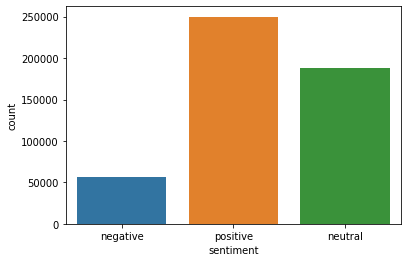

In [88]:
sns.countplot('sentiment',data= Tweet)

## Brand Count

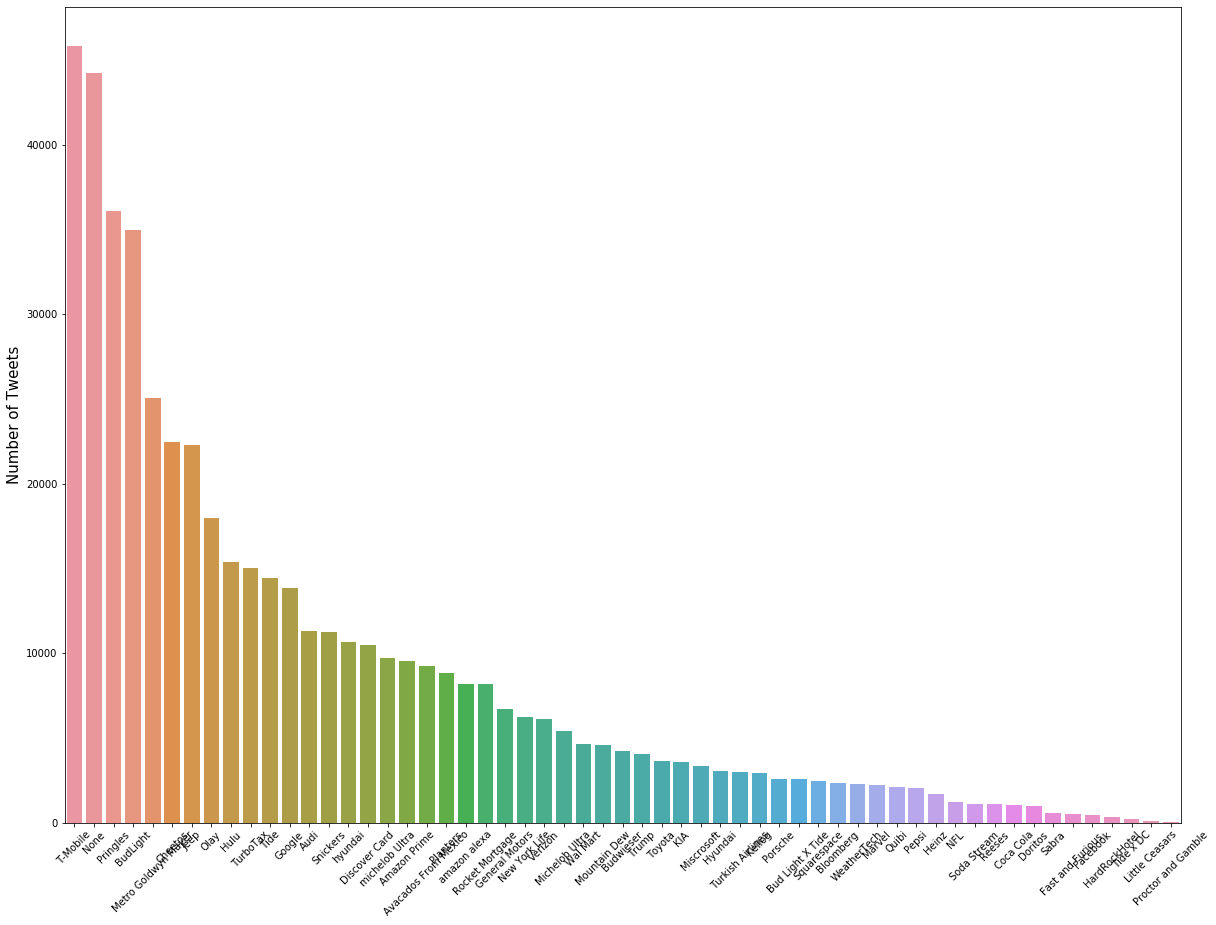

In [89]:
Brand_count=Tweet['Brand'].value_counts()
fig, ax = plt.subplots(figsize=(20,15))
bar = sns.barplot(Brand_count.index,Brand_count.values)

plt.xticks(rotation=45)
plt.ylabel('Number of Tweets',fontsize=15)
plt.show()

## word cloud

In [90]:
# pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
negat_tw=Tweet[Tweet['sentiment']=='negative']
words = ' '.join(negat_tw['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [91]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

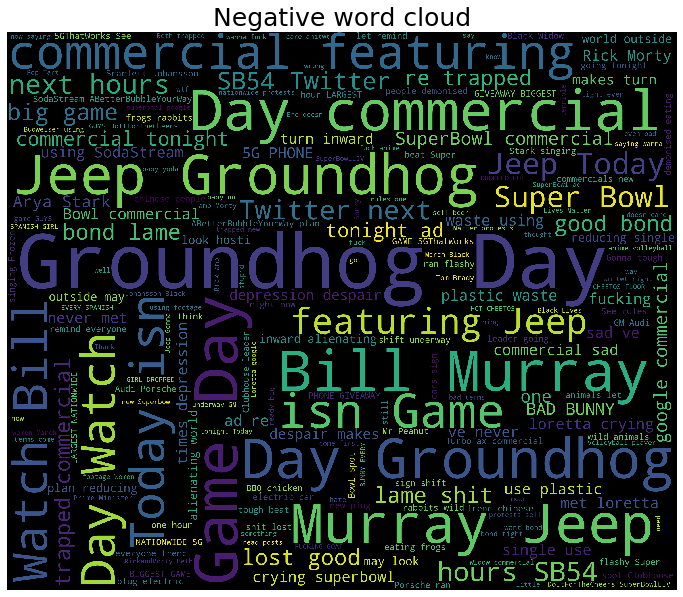

In [92]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative word cloud',fontsize=25)
plt.show()

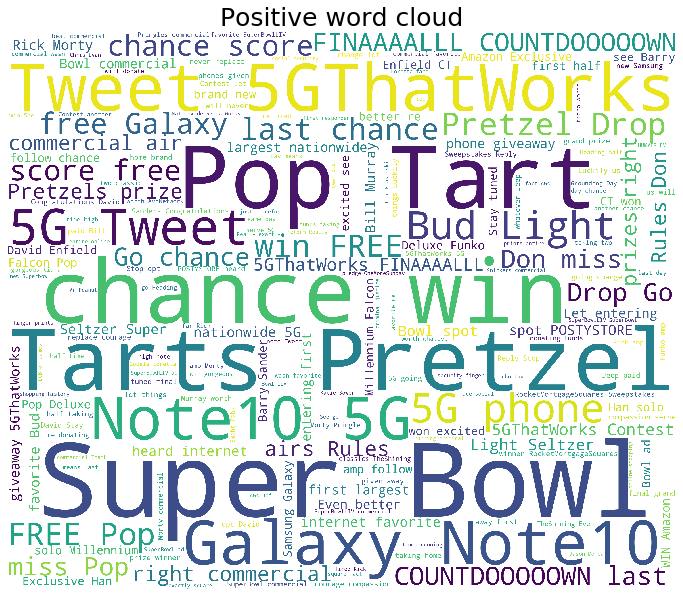

In [93]:

pos_tw=Tweet[Tweet['sentiment']=='positive']
pos_words = ' '.join(pos_tw['text'])
cleaned_word = " ".join([word for word in pos_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_positive = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_positive)
plt.title('Positive word cloud',fontsize=25)
plt.axis('off')
plt.show()

# Analysis

In [104]:
ads_info = pd.read_excel('renew ver2.xlsx')
ads_info.rename(columns={'Brand_Cleaned':'Brand'},inplace=True)
ads_info.head()

,Brand,time(seconds),Cost/ 30 Sec,moral value vs funny,tv drama celebraty related/ with out star
0,Amazon Alexa,90,1680000.0,F,Y
1,Amazon Prime,60,1120000.0,N,Y
2,Audi,60,1120000.0,N,Y
3,Avacados From Mexico,30,560000.0,F,N
4,Bloomberg,60,1120000.0,M,Y


In [105]:
Tw_cost.head()

,favorite_count,reply_count,user.followers_count,retweet_count,engage
Brand,,,,,
Amazon Prime,28631,2609,76433706,5832,37072
Audi,52060,4079,337185165,6682,62821
Avacados From Mexico,13903,1759,28593427,2587,18249
Bloomberg,7205,338,14795189,1398,8941
Bud Light X Tide,139194,2909,27737828,18480,160583


In [120]:
analy_tw = pd.merge(pd.merge(Tw_cost,ads_info, on ='Brand',how='inner'),pos_neg,on ='Brand',how='inner')
analy_tw.rename(columns={'timestamp':'pos_neg'},inplace=True)
analy_tw['eng_per_sec'] = analy_tw['engage']/analy_tw['time(seconds)']
analy_tw.head()

,Brand,favorite_count,reply_count,user.followers_count,retweet_count,engage,time(seconds),Cost/ 30 Sec,moral value vs funny,tv drama celebraty related/ with out star,pos_neg,eng_per_sec
0,Amazon Prime,28631,2609,76433706,5832,37072,60,1120000.0,N,Y,2.802098,617.866667
1,Audi,52060,4079,337185165,6682,62821,60,1120000.0,N,Y,1.580656,1047.016667
2,Avacados From Mexico,13903,1759,28593427,2587,18249,30,560000.0,F,N,4.342430,608.300000
3,Bloomberg,7205,338,14795189,1398,8941,60,1120000.0,M,Y,3.511278,149.016667
4,Bud Light X Tide,139194,2909,27737828,18480,160583,15,280000.0,F,N,4.234694,10705.533333


Here I want to know per second of ads invested how likely we generate positive engagement per second relative to negative enagement per second
.I simply multiply the two and it gives me a new feature that capture those information

In [121]:

analy_tw['magnitude per second'] = analy_tw['pos_neg'] * analy_tw['eng_per_sec']

In [181]:
analy_tw.groupby('moral value vs funny').mean()['eng_per_sec']

moral value vs funny
F    1241.307659
M     443.178782
N     928.955623
Name: eng_per_sec, dtype: float64

In [182]:
analy_tw.groupby('moral value vs funny').mean()['magnitude per second']


moral value vs funny
F    6481.344130
M    2717.835939
N    3172.904740
Name: magnitude per second, dtype: float64

In [190]:
analy_tw.groupby('tv drama celebraty related/ with out star').mean()['eng_per_sec']

tv drama celebraty related/ with out star
N    1028.765367
Y     878.940211
Name: eng_per_sec, dtype: float64

In [184]:
analy_tw.groupby('tv drama celebraty related/ with out star').mean()['magnitude per second']

tv drama celebraty related/ with out star
N    4842.319613
Y    4529.114376
Name: magnitude per second, dtype: float64

### Hypothesis testing on Funny ads vs Series ads
Null hypothesis: the mean of magnitude per second is no difference between funny ads and series ads  

Alternative hypothesis : the mean of magnitude per second is higher for funny ads than series ads 

This is a one way two sample t-test and we assume independence. That means that the mean of each ads won't affect one another
Now we will test on a 5% significant level

In [162]:
# Hypothesis testing on Funny ads vs Series ads
import numpy as np
from scipy import stats

mean_f = analy_tw[(analy_tw['moral value vs funny']=='F')].mean()['magnitude per second']
mean_m = analy_tw[(analy_tw['moral value vs funny']=='M')].mean()['magnitude per second']

std_f = analy_tw[(analy_tw['moral value vs funny']=='F')].std()['magnitude per second']
std_m = analy_tw[(analy_tw['moral value vs funny']=='M')].std()['magnitude per second']

n_f= len(analy_tw[(analy_tw['moral value vs funny']=='F')])
n_m = len(analy_tw[(analy_tw['moral value vs funny']=='M')])

# Test statistics

t_test_type = (mean_f-mean_m)/np.sqrt((std_f**2/n_f)+(std_m**2/n_m))
# degrees of freedom
df_2 = n_f + n_m - 2
# p value
pval = stats.t.sf(t_test_type, df)
pval

0.10413735739996066

Since the p value is 0.105 >0.05, we failed to reject the null hypothesis and we conclude that there is not enough evidence to show the funny ads is more effective at the 5% significant level.

In [191]:
mean_f = analy_tw[(analy_tw['moral value vs funny']=='F')].mean()['eng_per_sec']
mean_m = analy_tw[(analy_tw['moral value vs funny']=='M')].mean()['eng_per_sec']

std_f = analy_tw[(analy_tw['moral value vs funny']=='F')].std()['eng_per_sec']
std_m = analy_tw[(analy_tw['moral value vs funny']=='M')].std()['eng_per_sec']

n_f= len(analy_tw[(analy_tw['moral value vs funny']=='F')])
n_m = len(analy_tw[(analy_tw['moral value vs funny']=='M')])

# Test statistics

t_test_type = (mean_f-mean_m)/np.sqrt((std_f**2/n_f)+(std_m**2/n_m))
# degrees of freedom
df_2 = n_f + n_m - 2
# p value
pval = stats.t.sf(t_test_type, df)
pval

0.05712070715548174

### Hypothesis testing on tv drama celebraty related/ without star

In [163]:
mean_y = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')].mean()['magnitude per second']
mean_n = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')].mean()['magnitude per second']

std_y = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')].std()['magnitude per second']
std_n = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')].std()['magnitude per second']

n_y= len(analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')])
n_n = len(analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')])

# Test statistics

t_test_cele = (mean_y-mean_n)/np.sqrt((std_y**2/n_y)+(std_n**2/n_n))
# degrees of freedom
df_2 = n_y + n_n - 2
# p value
pval = stats.t.sf(t_test_cele, df)
pval

0.5433371545024289

In [168]:
mean_y = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')].mean()['eng_per_sec']
mean_n = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')].mean()['eng_per_sec']

std_y = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')].std()['eng_per_sec']
std_n = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')].std()['eng_per_sec']

n_y= len(analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')])
n_n = len(analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')])

# Test statistics

t_test_cele = (mean_y-mean_n)/np.sqrt((std_y**2/n_y)+(std_n**2/n_n))
# degrees of freedom
df_2 = n_y + n_n - 2
# p value
pval = stats.t.sf(t_test_cele, df)
pval

0.605328626101722

### Hypothesis testing on duration

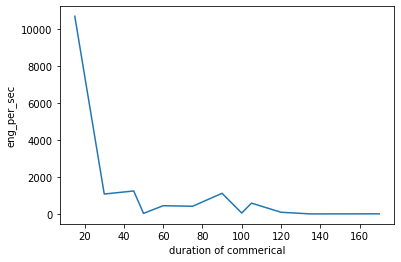

In [238]:
a=dict()
for duration in sorted(list(analy_tw['time(seconds)'].unique())): 
    a[duration]=(analy_tw[(analy_tw['time(seconds)']==duration)].mean()['eng_per_sec'])

lists = sorted(a.items())    
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure()
plt.plot(x, y)
plt.xlabel('duration of commerical')
plt.ylabel('eng_per_sec')
plt.show()

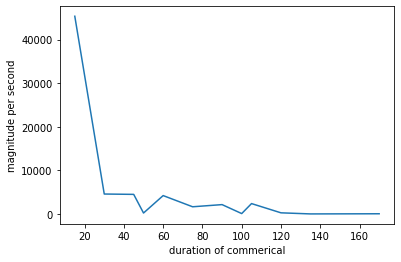

In [239]:
a=dict()
for duration in sorted(list(analy_tw['time(seconds)'].unique())): 
    a[duration]=(analy_tw[(analy_tw['time(seconds)']==duration)].mean()['magnitude per second'])

lists = sorted(a.items())    
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure()
plt.plot(x, y)
plt.xlabel('duration of commerical')
plt.ylabel('magnitude per second')
plt.show()

From the above graph, it seems like 15 seconds generate most engagement per second, it declines significantly after the 15 second threshold

Now we want to test if the engagement from 15 second is actually significant different from other duration

In [175]:
mean_y = analy_tw[(analy_tw['time(seconds)']=='Y')].mean()['magnitude per second']
mean_n = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')].mean()['magnitude per second']

std_y = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')].std()['magnitude per second']
std_n = analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')].std()['magnitude per second']

n_y= len(analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='Y')])
n_n = len(analy_tw[(analy_tw['tv drama celebraty related/ with out star']=='N')])

# Test statistics

t_test_cele = (mean_y-mean_n)/np.sqrt((std_y**2/n_y)+(std_n**2/n_n))
# degrees of freedom
df_2 = n_y + n_n - 2
# p value
pval = stats.t.sf(t_test_cele, df)
pval

1028.765366591081